<a href="https://colab.research.google.com/github/Sahar-dev/Clustering/blob/main/Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
install.packages("factoextra")
library(factoextra)
install.packages("FactoMineR")
library("FactoMineR")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Lecture des données et Statistiques descriptives

In [29]:
# Charger les données depuis un fichier CSV dans un data frame
donnees <- read.csv2("data.csv", header = TRUE, sep = ",", dec = '.', row.names = 1)
# Afficher les statistiques descriptives pour le jeu de données
summary(donnees)

    January         February         March            April      
 Min.   :0.400   Min.   :1.500   Min.   : 5.600   Min.   : 8.90  
 1st Qu.:2.400   1st Qu.:3.350   1st Qu.: 7.550   1st Qu.:10.00  
 Median :4.700   Median :5.300   Median : 7.800   Median :10.70  
 Mean   :3.973   Mean   :4.833   Mean   : 8.233   Mean   :10.98  
 3rd Qu.:5.550   3rd Qu.:6.200   3rd Qu.: 9.550   3rd Qu.:12.20  
 Max.   :7.500   Max.   :8.500   Max.   :10.800   Max.   :13.30  
      May             June            July           August     
 Min.   :11.60   Min.   :14.40   Min.   :15.60   Min.   :16.00  
 1st Qu.:13.70   1st Qu.:17.15   1st Qu.:18.90   1st Qu.:18.45  
 Median :14.30   Median :17.50   Median :19.40   Median :19.10  
 Mean   :14.43   Mean   :17.83   Mean   :19.83   Mean   :19.57  
 3rd Qu.:15.35   3rd Qu.:19.00   3rd Qu.:20.90   3rd Qu.:20.95  
 Max.   :16.80   Max.   :20.80   Max.   :23.30   Max.   :22.80  
   September        October         November         December    
 Min.   :14.70   

In [31]:
sum(is.na(donnees))

[1] 0

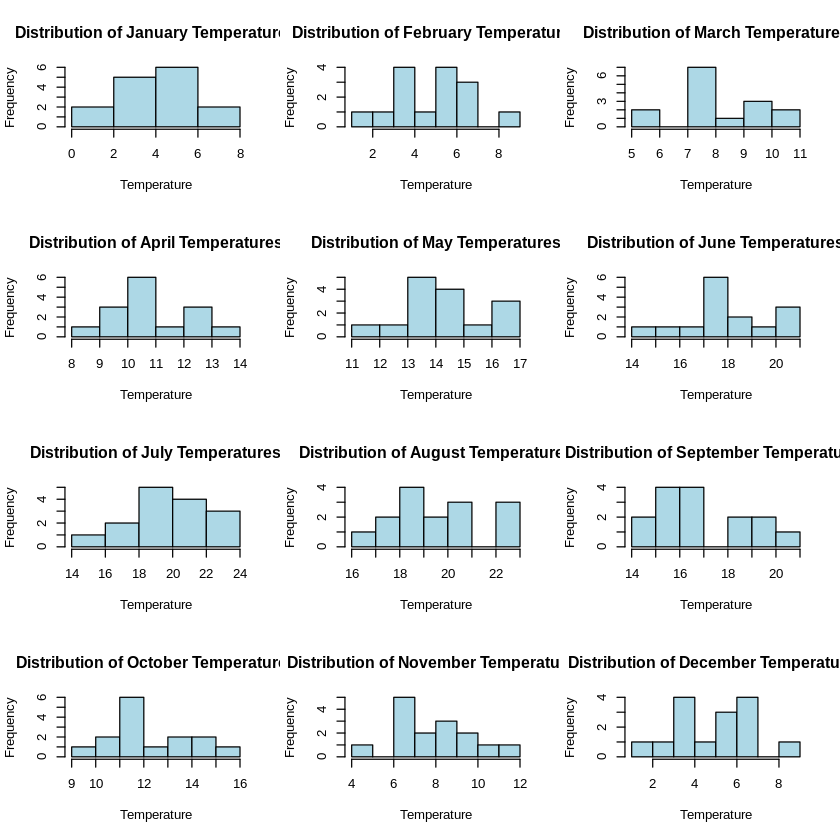

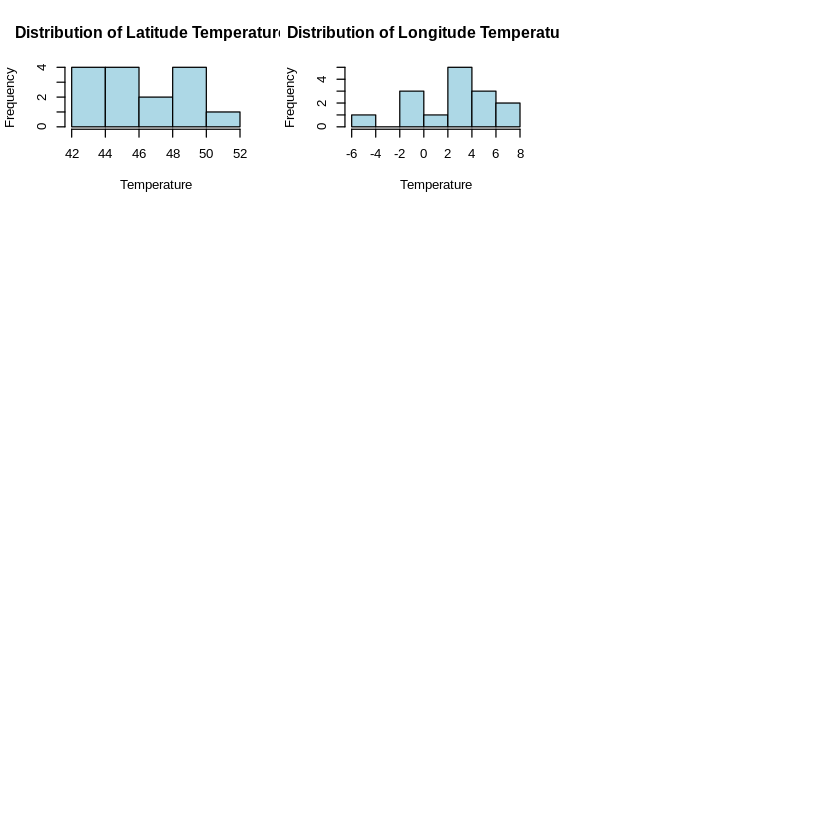

In [32]:
par(mfrow = c(4, 3))  # Set up a 4x3 grid for 12 plots

# Loop through each column (assuming your data has 12 columns, one for each month)
for (col in colnames(donnees)) {
  hist(df[[col]], main = paste("Distribution of", col, "Temperatures"), xlab = "Temperature", col = "lightblue", border = "black")
}

# Reset the plotting layout to default
par(mfrow = c(1, 1))

Distribution des températures :
* La distribution entre le minimum et le maximum indique la variabilité.
* Distribution légèrement asymétrique à droite (moyennes > médianes).

Tendances saisonnières :
* Les températures augmentent généralement de janvier à août.
* Une baisse est observée de septembre à décembre.

Latitude et longitude :
* Lieux géographiques exprimés en degrés.
* Latitude (nord-sud), longitude (est-ouest).

# Analyse de regroupement (Clustering)

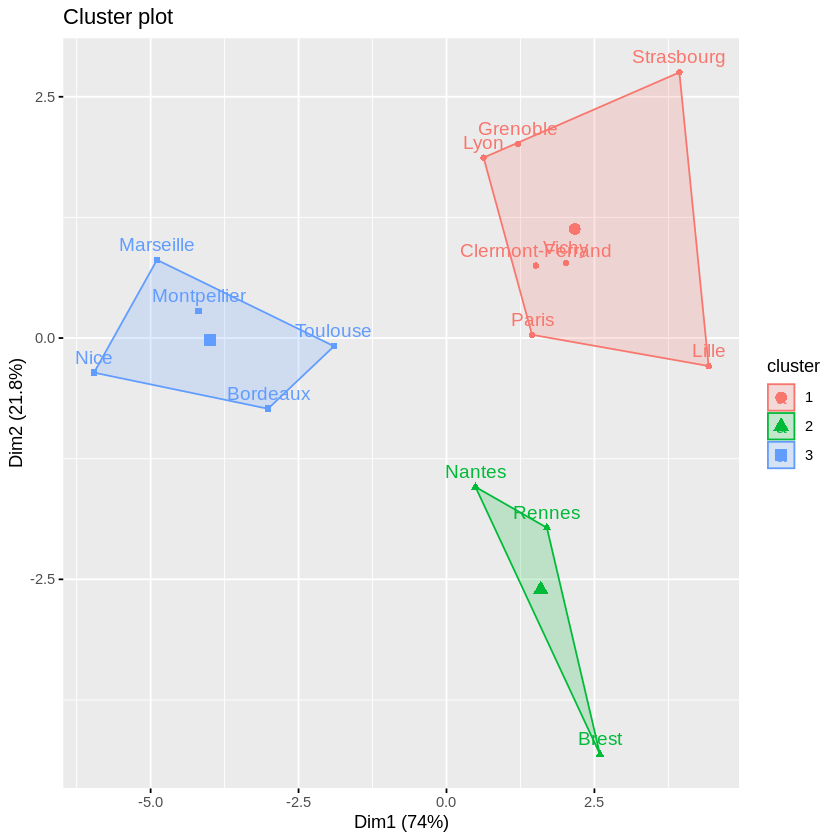

In [33]:
#Clustering K-Means
modele_kmeans <- kmeans(donnees, 3)
#Visualiser les clusters K-Means avec un graphique de dispersion
fviz_cluster(modele_kmeans, data = donnees)


Cluster 1 (par exemple, Marseille, Montpellier, Nice, Toulouse, Bordeaux) :
* Les villes se situent principalement autour de 0,0 dans la dimension 2 (21 %) et approximativement à -4 dans la dimension 1 (74 %).
* Ces villes partagent des caractéristiques similaires représentées par les features utilisés dans le regroupement.

Cluster 2 (par exemple, Nantes, Rennes, Brest) :

* Le centre du cluster se situe autour de -2,6 dans la dimension 2 et de 2,25 dans la dimension 1.
* Ces villes ont des caractéristiques distinctes, ce qui les différencie du groupe 1.

Groupe 3 (par exemple, Lyon, Grenoble, Strasbourg, Lille, Paris) :

* Le cluster est centré autour de 2 dans la dimension 2 et de 2,25 dans la dimension 1.
* Ce groupe représente un autre ensemble de villes ayant des points communs dans les caractéristiques choisies.

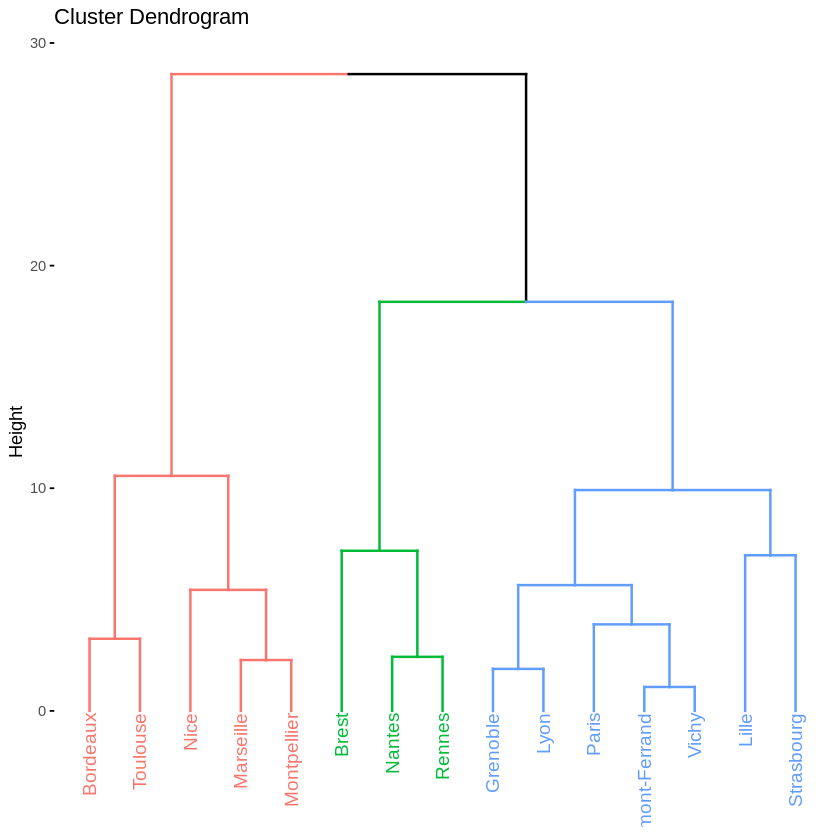

In [34]:
# Clustering Hiérarchique (CAH)
modele_cah <- hcut(donnees, 3)
# Visualiser le dendrogramme du clustering hiérarchique
fviz_dend(modele_cah, k = 3)

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

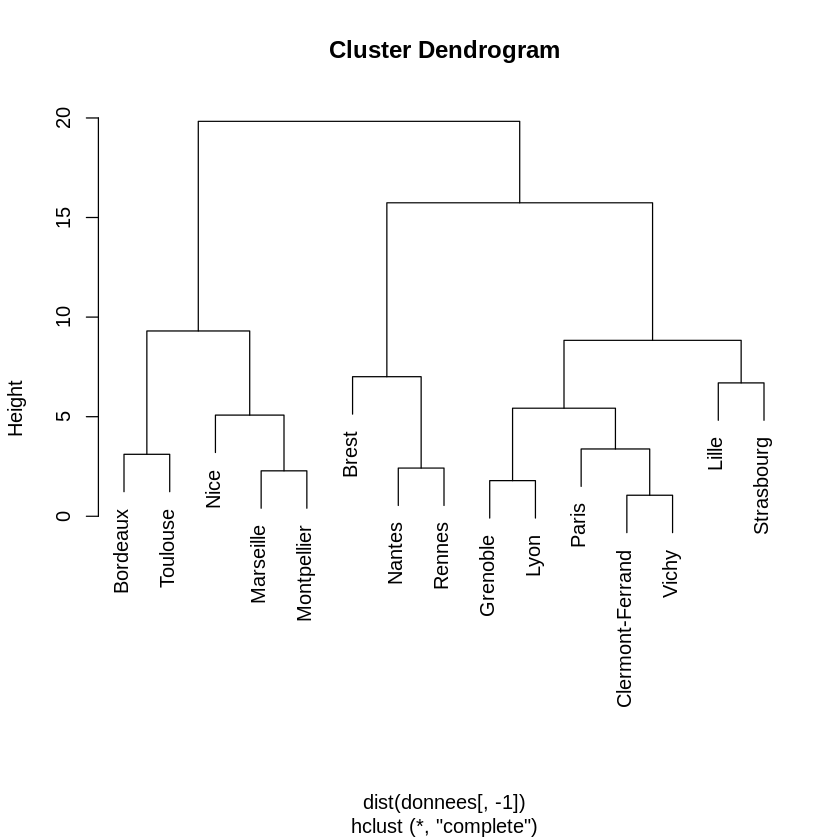

In [35]:
# Clustering hiérarchique sur les composantes principales (HCPC)
hc <- hclust(dist(donnees[, -1]))
plot(hc)
HCPC(donnees, nb.clust = 3, min = 3, max = NULL, graph = TRUE)

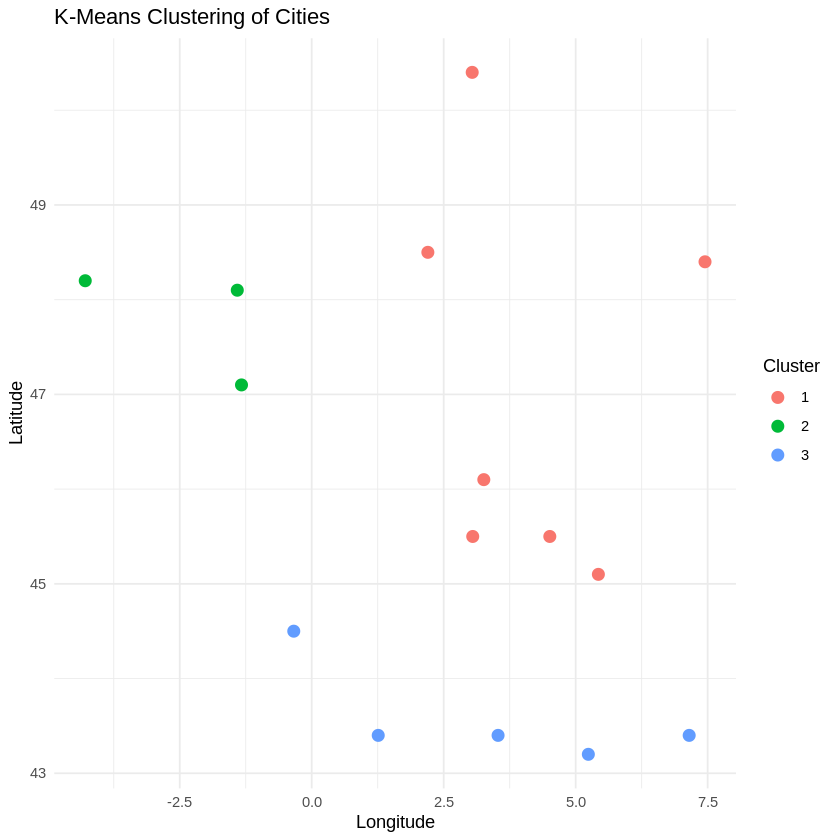

In [73]:

ggplot(donnees, aes(x = Longitude, y = Latitude, color = factor(modele_kmeans$cluster))) +
  geom_point(size = 3) +

  labs(title = "K-Means Clustering of Cities",
       x = "Longitude",
       y = "Latitude",
       color = "Cluster") +
  theme_minimal()


# Analyse d'inertie et Visualisation

In [17]:
set.seed(42)

In [37]:
# Initialiser les vecteurs pour stocker les inerties et les valeurs R²
Iinerties <- numeric()
Iinterclasses <- numeric()
Igenerales <- numeric()
valeurs_r_carre <- numeric()
max_clusters <- 14

In [38]:
# Boucler à travers différentes tailles de clusters
for (k in 1:max_clusters) {
  # Adapter le modèle K-Means
  resultat_kmeans <- kmeans(donnees, k)

  # Calculer les inerties et les valeurs R²
  Iinertie <- resultat_kmeans$tot.withinss
  Igenerale <- resultat_kmeans$totss
  Iinterclasse <- Igenerale - Iinertie
  wss <- sum(resultat_kmeans$withinss)
  tss <- sum((donnees - colMeans(donnees))^2)

  # Stocker les valeurs calculées
  Iinerties[k] <- Iinertie
  Iinterclasses[k] <- Iinterclasse
  Igenerales[k] <- Igenerale
  valeurs_r_carre[k] <- 1 - wss / tss
}

In [39]:
# Créer des data frames pour la visualisation
inertie_data <- data.frame(Clusters = 1:max_clusters, Iinertie = Iinerties, Iinterclasse = Iinterclasses, Igenerale = Igenerales)
r_carre_data <- data.frame(Clusters = 1:max_clusters, R_carre = valeurs_r_carre)

In [25]:
# Visualiser l'analyse d'inertie
library(ggplot2)

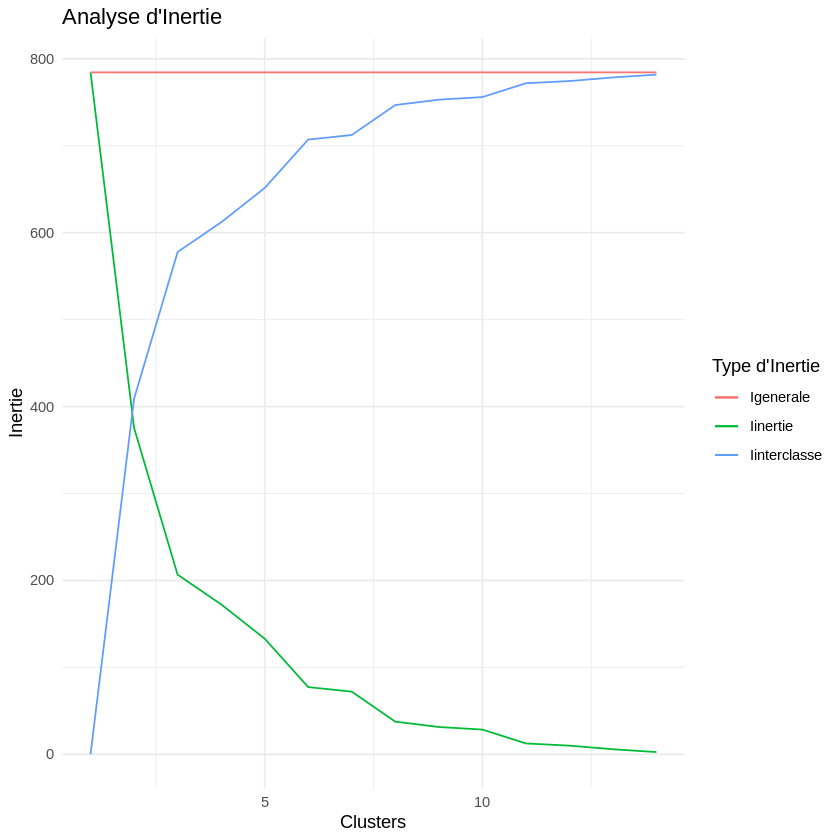

In [40]:
ggplot(inertie_data, aes(x = Clusters)) +
  geom_line(aes(y = Iinertie, color = "Iinertie")) +
  geom_line(aes(y = Iinterclasse, color = "Iinterclasse")) +
  geom_line(aes(y = Igenerale, color = "Igenerale")) +
  labs(title = "Analyse d'Inertie", y = "Inertie", color = "Type d'Inertie") +
  theme_minimal()

the Igenerale almost steady in y=795
Iinertie starts from y=795 and goes almost prfectly down

Interprétation :

La baisse de Iinertie indique que l'ajout de clusters améliore l'homogénéité à l'intérieur de chaque cluster.
Le point " elbow " dans Iinertie peut indiquer un nombre optimal de clusters, où la poursuite du regroupement produit des effets décroissants en termes de réduction de la variance à l'intérieur des clusters.
La stabilité d'Igenerale suggère que la variance totale des données n'est pas influencée de manière significative par le nombre de clusters.


K=3

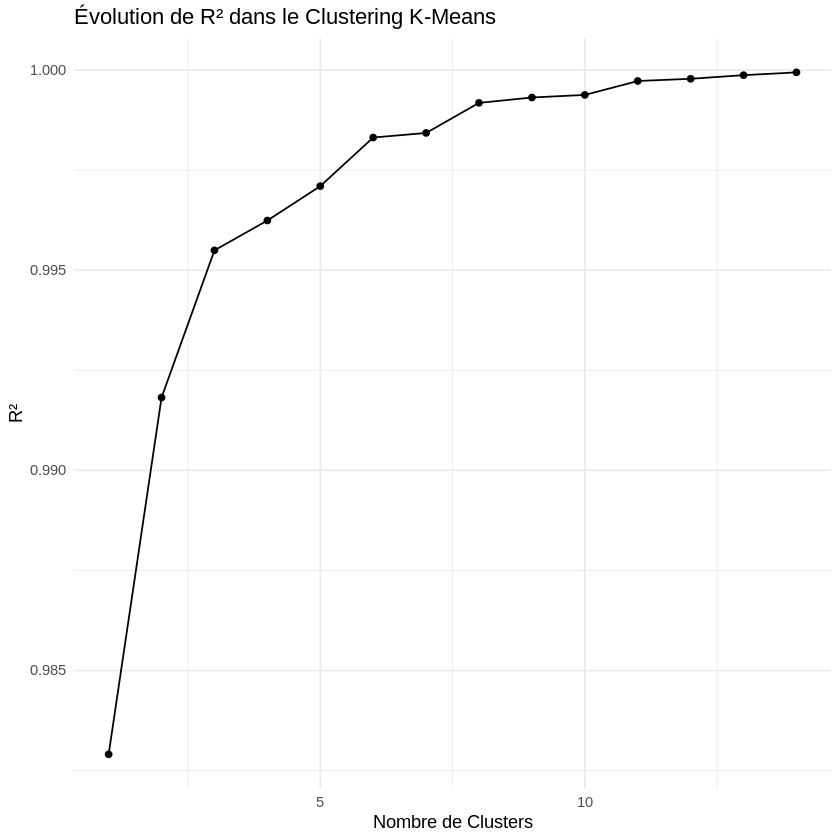

In [41]:
# Visualiser l'évolution de R² dans le clustering K-Means
ggplot(r_carre_data, aes(x = Clusters, y = R_carre)) +
  geom_line() +
  geom_point() +
  labs(title = "Évolution de R² dans le Clustering K-Means",
       x = "Nombre de Clusters",
       y = "R²") +
  theme_minimal()

# Analyse de la variance (ANOVA) pour le clustering K-Means

In [42]:
# Initialiser une liste pour stocker les résultats ANOVA et les valeurs d'eta carré
resultats_anova <- list()
valeurs_eta_carre <- numeric()

In [43]:
# Boucler à travers chaque variable quantitative
for (i in 1:ncol(donnees)) {
  moyennes_groupes <- tapply(donnees[, i], modele_kmeans$cluster, mean)
  tailles_groupes <- table(modele_kmeans$cluster)
  variance_totale <- var(donnees[, i]) * (nrow(donnees) - 1)
  variance_intergroupes <- sum(tailles_groupes * (moyennes_groupes - mean(donnees[, i]))^2)
  eta_carre <- variance_intergroupes / variance_totale
  valeurs_eta_carre[i] <- eta_carre
  K <- (nrow(donnees) - k) * eta_carre / ((k - 1) * (1 - eta_carre))
  p_value <- pf(K, df1 = k - 1, df2 = nrow(donnees) - k, lower.tail = FALSE)
  resultats_anova[[colnames(donnees)[i]]] <- list(Statistique_K = K, Valeur_p = p_value)
}

In [44]:
# Afficher les résultats de l'ANOVA
str(resultats_anova)
print(valeurs_eta_carre)

List of 14
 $ January  :List of 2
  ..$ Statistique_K: num 0.332
  ..$ Valeur_p     : num 0.894
 $ February :List of 2
  ..$ Statistique_K: num 0.357
  ..$ Valeur_p     : num 0.882
 $ March    :List of 2
  ..$ Statistique_K: num 0.334
  ..$ Valeur_p     : num 0.893
 $ April    :List of 2
  ..$ Statistique_K: num 0.295
  ..$ Valeur_p     : num 0.912
 $ May      :List of 2
  ..$ Statistique_K: num 0.194
  ..$ Valeur_p     : num 0.959
 $ June     :List of 2
  ..$ Statistique_K: num 0.202
  ..$ Valeur_p     : num 0.956
 $ July     :List of 2
  ..$ Statistique_K: num 0.194
  ..$ Valeur_p     : num 0.959
 $ August   :List of 2
  ..$ Statistique_K: num 0.283
  ..$ Valeur_p     : num 0.917
 $ September:List of 2
  ..$ Statistique_K: num 0.376
  ..$ Valeur_p     : num 0.873
 $ October  :List of 2
  ..$ Statistique_K: num 0.393
  ..$ Valeur_p     : num 0.865
 $ November :List of 2
  ..$ Statistique_K: num 0.324
  ..$ Valeur_p     : num 0.897
 $ December :List of 2
  ..$ Statistique_K: num 0.284


# Regroupement hybride : Clustering Hiérarchique suivi de K-Means

In [51]:
# Réaliser le clustering hiérarchique
hc <- hclust(dist(donnees[, -1]), method = "ward.D2")

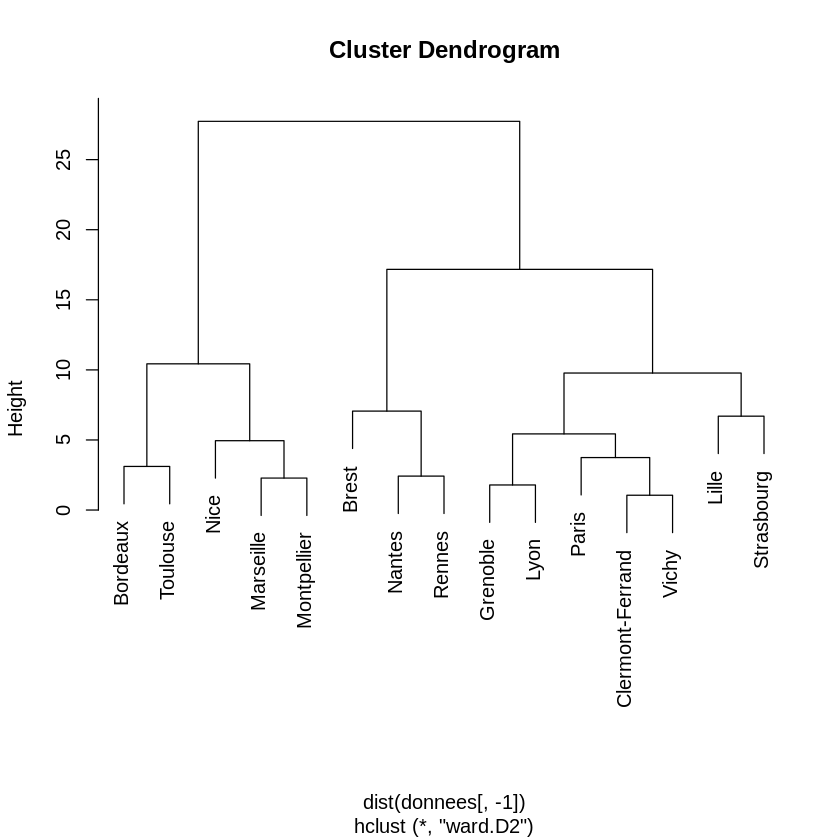

In [46]:
# Visualiser le dendrogramme pour aider à décider du nombre de clusters
plot(hc)

In [47]:
# Couper le dendrogramme pour obtenir les centroids initiaux
k <- 3
clusters <- cutree(hc, k)

In [48]:
# Calculer les centroids initiaux
centroids_initiaux <- aggregate(donnees, by = list(clusters), FUN = mean)
centroids_initiaux <- as.data.frame(centroids_initiaux[, -1])

In [49]:
# Réaliser le clustering K-Means en utilisant les centroids initiaux du clustering hiérarchique
set.seed(42)
hybride <- kmeans(donnees, centers = as.matrix(centroids_initiaux), nstart = 1)

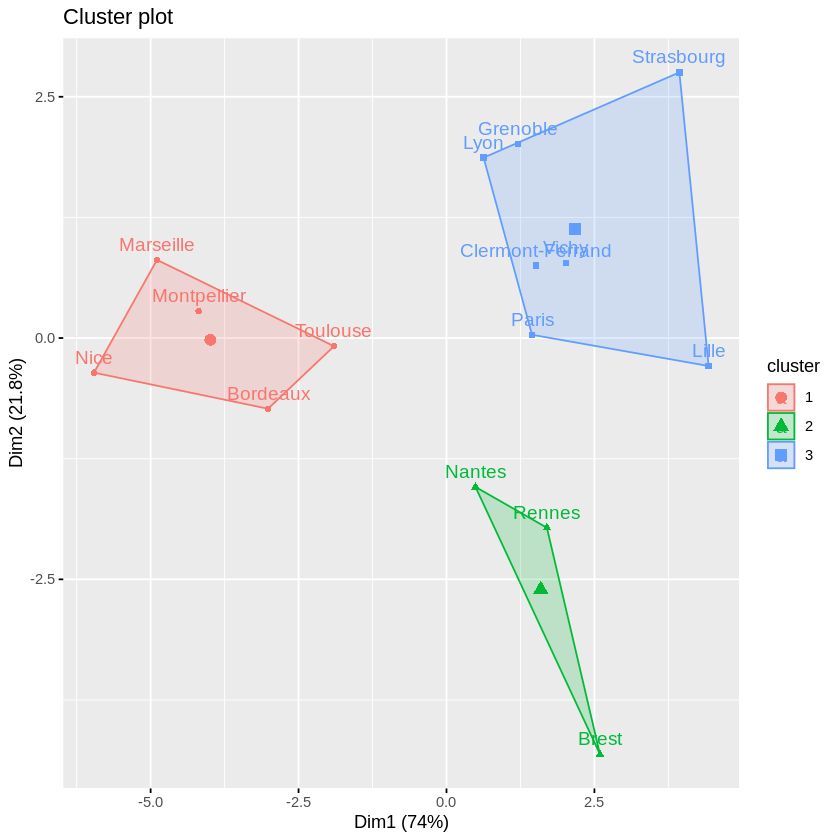

In [50]:
# Visualiser les clusters K-Means dans l'approche hybride
fviz_cluster(hybride, donnees)